In [1]:
#this program will make the raw magnitude data files

#if you use this code, please cite Oelkers & Stassun 2018
#import the relevant libraries for basic tools
import numpy as np

#import relevant libraries for a list
import glob, os
from os import listdir
from os.path import isfile, join, exists
from time import strftime
import pandas as pd
import astropy.io.fits as fits
import matplotlib.pyplot as plt

In [42]:
season = 3
skygroup = 1
skygroup = str(skygroup)
season = str(season)
sky = str(skygroup).zfill(2)

comp = 'usuario'
####UPDATE INFORMATION HERE####
###be sure to update the number of light curves on line 40, now for simplicity, it is set to 100
#useful directories
cdedir = '/home/'+comp+'/dia_kepler/mychanges/Python/' # code directory
#difer = '/home/'+comp+'/Documents/Mestrado/FFIs/testeall/clean/s'+season+'/'
difdir = '/home/'+comp+'/Documents/Mestrado/FFIs/testeall/clean/s'+season+'/dif'+season+'/' # directory to put the differenced images
caldir = '/home/'+comp+'/Documents/Mestrado/FFIs/testeall/clean/masters/season' # directory with master frame information
lcdir  = '/home/usuario/lc/' # directory to put the light curves

In [43]:
#open the dif.flux files depois vou ter que aprender a somar com outras seasons - escolher por skygroup
#get the flux lists
os.chdir(difdir) #changes to the raw image direcotory
files = [f for f in glob.glob("*.flux") if isfile(join(difdir, f))] #gets the relevant files with the proper extension
files.sort()
nfiles = len(files)
os.chdir(cdedir) #changes back to the code directory

#read in the master frame information to get the star count
ids, xm, ym, ttmg, mstmg, mstmge = np.loadtxt(caldir+season+'/'+skygroup+'_master.ap', unpack =1,delimiter=',',usecols=(0,1,2,3,4,5))
nstars = len(ids)

cols = ('ids','xm','ttmg','mstmg','mstmge')
master = pd.read_csv(caldir+season+'/'+skygroup+'_master.ap',sep =',',header=None,names=cols)
nstars = len(master['ids'])
# files

#/home/sonic/Documents/Mestrado/FFIs/testeall/clean/s

holder = [[]]*nfiles

cols_difer = ('idd', 'mx', 'my', 'jdh', 'flxh', 'flx_errh','mgh','mgh_errh','season')
for i in range(nfiles):
    difer_table = pd.read_csv(difdir+files[i],sep =',',header=None,names=cols_difer)
    holder[i] = difer_table
#     #condition with bad magnitude flag?
#     for j in range(len(difer_table['idd'])):
#         difer_ref.loc[j].append(difer_table.loc[j])

for j in range(0, nstars): 
    #make a file name from the ticid
    nm=str(holder[0].loc[j]['idd'])+'.lcxx'

    #write out the light curve
    output1=open(lcdir+nm, 'w')
    for jj in range(0, nfiles):
        output1.write(str(holder[jj].loc[j]['jdh'])+','+str(holder[jj].loc[j]['flxh'])+','+str(holder[jj].loc[j]['flx_errh'])+','+str(holder[jj].loc[j]['mgh'])+','+str(holder[jj].loc[j]['mgh_errh'])+','+str(holder[jj].loc[j]['season'])+'\n')
                      #jd, str(numpy.round(mg[jj,ii], decimals = 6)), str(numpy.round(er[jj,ii], decimals = 6)))
    output1.close()


## Define the kic id

In [241]:
season = str(0)
os.chdir('/home/usuario/lc'+season)

# files = [f for f in glob.glob("*.lcxx") if isfile(join('/home/usuario/lc'+season, f))]
# files[0].split('.')[0]

In [242]:
name = input("choose the kic id ")
star = str(name)+'.0.lcxx'

choose the kic id 11413213


## READ 1 STAR OF SEASON 0

In [243]:
season = str(0)
os.chdir('/home/usuario/lc'+season)

#changes to the raw image direcotory
# files = [f for f in glob.glob("*.lcxx") if isfile(join('/home/usuario/lc'+season, f))] #gets the relevant files with the proper extension
# files.sort()
# nfiles = len(files)

cols = ('jd','flx','flx_err','mag','magerr','season')
a = pd.read_csv(star,sep =',',header=None,names=cols)

FileNotFoundError: File b'11413213.0.lcxx' does not exist

In [229]:
star

'12159893.0.lcxx'

## READ 1 STAR OF SEASON 1

In [230]:
season = str(1)
os.chdir('/home/usuario/lc'+season) #changes to the raw image direcotory
# files = [f for f in glob.glob("*.lcxx") if isfile(join('/home/usuario/lc'+season, f))] #gets the relevant files with the proper extension
# files.sort()
# nfiles = len(files)

cols = ('jd','flx','flx_err','mag','magerr','season')
b = pd.read_csv(star,sep =',',header=None,names=cols)

## READ 1 STAR OF SEASON 2

In [231]:
season = str(2)
os.chdir('/home/usuario/lc'+season) #changes to the raw image direcotory

# files = [f for f in glob.glob("*.lcxx") if isfile(join('/home/usuario/lc'+season, f))] #gets the relevant files with the proper extension
# files.sort()
# nfiles = len(files)

cols = ('jd','flx','flx_err','mag','magerr','season')
c = pd.read_csv(star,sep =',',header=None,names=cols)

## READ 1 STAR OF SEASON 3

In [232]:
season = str(3)
os.chdir('/home/usuario/lc'+season) #changes to the raw image direcotory

# files = [f for f in glob.glob("*.lcxx") if isfile(join('/home/usuario/lc'+season, f))] #gets the relevant files with the proper extension
# files.sort()
# nfiles = len(files)

cols = ('jd','flx','flx_err','mag','magerr','season')
d = pd.read_csv(star,sep =',',header=None,names=cols)

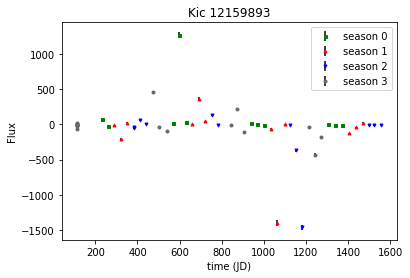

In [233]:
plt.errorbar(a['jd'],a['flx'],a['flx_err'],fmt='s',ecolor='black',color='green',markersize=3,label='season 0')#,barsabove=True)
plt.errorbar(b['jd'],b['flx'],b['flx_err'],fmt='^',ecolor='black',color='red',markersize=3,label='season 1')#,barsabove=True)
plt.errorbar(c['jd'],c['flx'],c['flx_err'],fmt='v',ecolor='black',color='b',markersize=3,label='season 2')#,barsabove=True)
plt.errorbar(d['jd'],d['flx'],d['flx_err'],fmt='o',ecolor='black',color='dimgray',markersize=3,label='season 3')#,barsabove=True)#,uplims=True,lolims=True)

plt.xlabel('time (JD)')
plt.ylabel('Flux')
plt.title('Kic '+name)
plt.legend()

plt.savefig('/home/usuario/lc_figs/'+name+'flux.png', dpi=300)

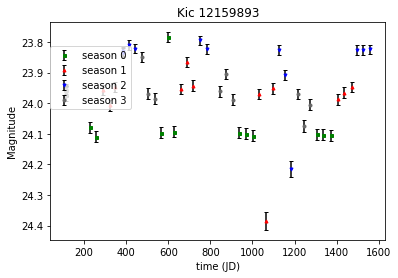

In [234]:
plt.errorbar(a['jd'],a['mag'],a['magerr'],fmt='s',capsize=2,ecolor='black',color='green',markersize=3,label='season 0')
plt.errorbar(b['jd'],b['mag'],b['magerr'],fmt='^',capsize=2,ecolor='black',color='red',markersize=3,label='season 1')
plt.errorbar(c['jd'],c['mag'],c['magerr'],fmt='v',capsize=2,ecolor='black',color='b',markersize=3,label='season 2')
plt.errorbar(d['jd'],d['mag'],d['magerr'],fmt='o',capsize=2,ecolor='black',color='dimgray',markersize=3,label='season 3')

plt.xlabel('time (JD)')
plt.ylabel('Magnitude')
plt.title('Kic '+name)
plt.gca().invert_yaxis()


plt.legend(loc=(0,0.6))
plt.savefig('/home/usuario/lc_figs/'+name+'mag.png', dpi=300)

# Open the catalogue

In [3]:
import pandas as pd
file = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/kic_cut.csv"
kic2 = pd.read_csv(file,sep=',',header=[0])

In [4]:
kic2[kic2.kct_sky_group_id_value==56]
kic2[kic2.kic_kepler_id==8462852]

,Unnamed: 0,kic_kepler_id,kic_ra,kic_degree_ra,kic_dec,kic_kepmag,kct_sky_group_id_value,kct_num_season_onCCD,kic_variable,kct_distance_0,...,kic_umag,kic_gmag,kic_rmag,kic_imag,kic_zmag,kic_gredmag,kic_d51mag,kic_jmag,kic_hmag,kic_kmag
3798661,3798661,8462852,20.104292,301.56439,44.456875,11.912,56.0,4,0,106.0,...,NaN,12.796,12.02,NaN,NaN,NaN,NaN,10.763,10.551,10.499
